In [7]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import matplotlib.cm as cm

plt.rcParams["font.family"] = "Times"
#configure plotting
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

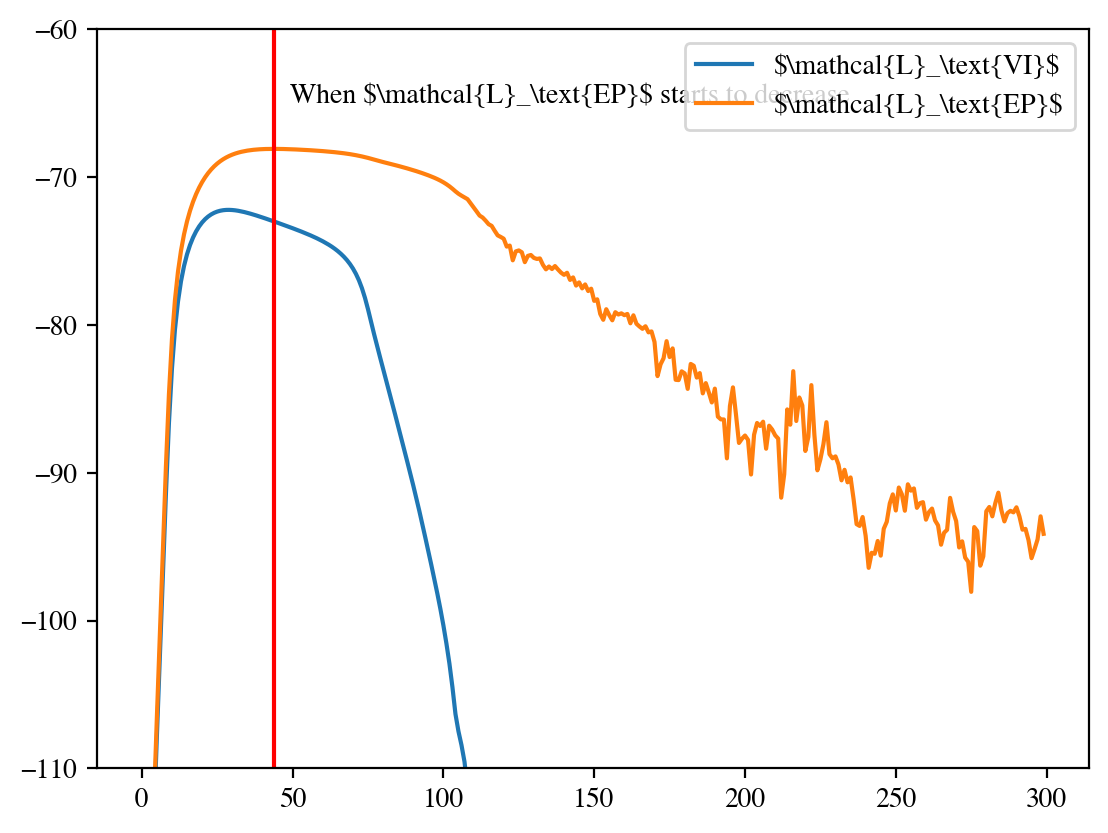

In [13]:
steps_num = 300

with open("../experiments/conflict-training-obj/experiment_results/old_fold_adam_exp_1_ionosphere_epcvi.pkl", "rb") as f:
    res = pickle.load(f)
    
len_tra = res['len_trajectory'][:steps_num]
sig_tra = np.sqrt(res['var_trajectory'])[:steps_num]
elbo = res['total_elbo'][:steps_num]
ep = res['total_ep'][:steps_num]

neg_index = np.nanargmax(ep)
ep[neg_index+1] - ep[neg_index]

plt.rcParams['text.usetex'] = False

ax = plt.figure()
plt.plot(elbo, label = '\$\\mathcal{L}_\\text{VI}\$')
plt.plot(ep, label = '\$\\mathcal{L}_\\text{EP}\$')
plt.ylim([-110, -60])
plt.axvline(x = neg_index, color = 'r')
plt.text(neg_index+5, -65, "When \$\\mathcal{L}_\\text{EP}\$ starts to decrease")
plt.legend()


(-1.0, 5.0, -1.0, 5.0)

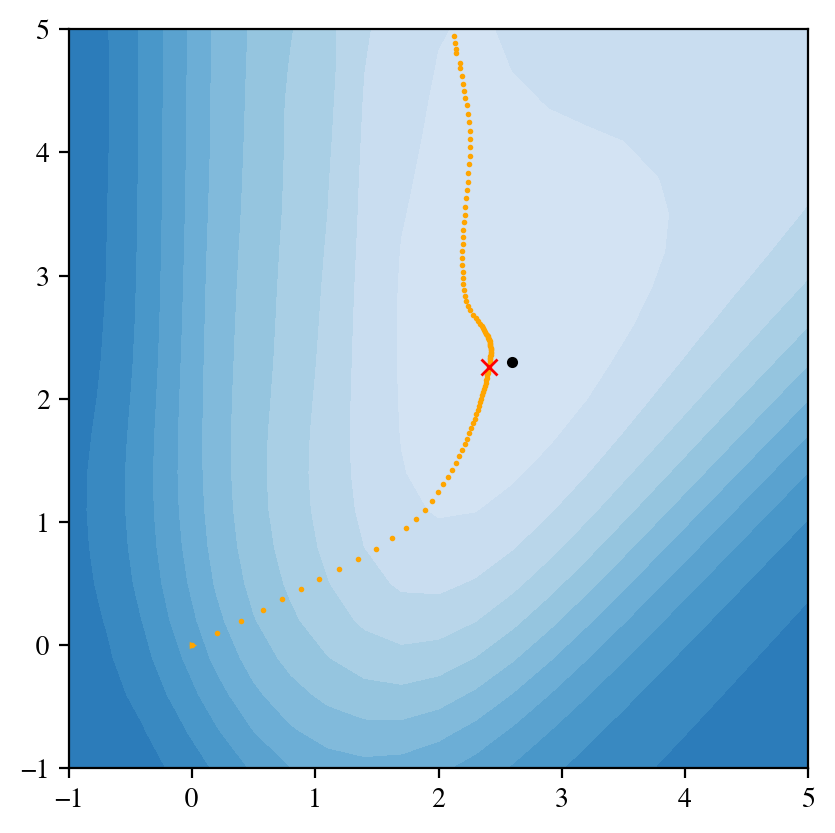

In [14]:
steps_num = 115

with open("../experiments/conflict-training-obj/experiment_results/old_fold_adam_exp_1_ionosphere_epcvi.pkl", "rb") as f:
    res = pickle.load(f)
    
len_tra = res['len_trajectory'][:steps_num]
sig_tra = np.sqrt(res['var_trajectory'])[:steps_num]
elbo = res['total_elbo'][:steps_num]
ep = res['total_ep'][:steps_num]

with open("../experiments/conflict-training-obj/experiment_results/ionosphere_cvi_fold_0.pkl", "rb") as f:
    lml_res = pickle.load(f)

lml = lml_res['mean_lml_ep']
SIGMA_GRID_MIN, SIGMA_GRID_MAX, L_GRID_MIN, L_GRID_MAX, GRID_NUM = lml_res["grid_min_max_num"]

x_index, y_index = np.where(lml==np.max(lml))
x_index, y_index = x_index[0], y_index[0]

CONTOUR_MIN, CONTOUR_MAX, CONTOUR_NUM = -0.9, -0.1, 20

marker_size = 1

log_l = np.linspace(L_GRID_MIN, L_GRID_MAX, GRID_NUM)
log_sigma = np.linspace(SIGMA_GRID_MIN, SIGMA_GRID_MAX, GRID_NUM)
[plot_x, plot_y] = np.meshgrid(log_l, log_sigma)

levels = np.linspace(CONTOUR_MIN, CONTOUR_MAX, CONTOUR_NUM)

# Get the colormap and set the under and bad colors
colMap = cm.Blues.reversed()
#colMap.set_bad(color='blue')
colMap.set_under(color='black')
plt.contourf(plot_x, plot_y, np.flip(lml, axis=0), cmap = colMap, levels=levels, extend='min')
plt.plot(log_l[y_index], np.flip(log_sigma)[x_index], 'ko', markersize=3, label='Optimal location')
plt.scatter(np.log(len_tra), np.log(sig_tra), color='orange', s=1)
plt.xlim([-1,5])
plt.ylim([-1,5])
plt.plot(np.log(len_tra)[neg_index], np.log(sig_tra)[neg_index], 'rx', label='Early stop location')
plt.plot(0,0, '>', color='orange',markersize=1,label='Start point')
#plt.legend()
plt.axis('square')